<a href="https://colab.research.google.com/github/Manojkumar-Siva/LGM--VIP-Task2/blob/main/lgm_mnist_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [10]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

1.0

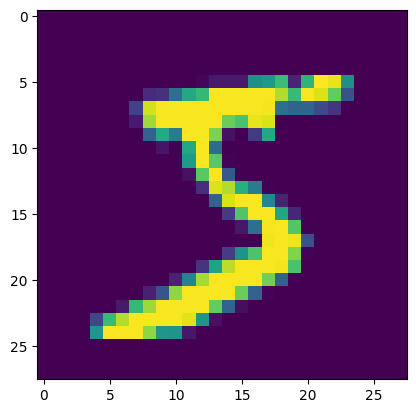

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape
X_test.shape
single_image= X_train[0]
single_image.shape
plt.imshow(single_image)
y_train.shape
X_train.min()
X_train.max()
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0
X_train_scaled.min()
X_train_scaled.max()

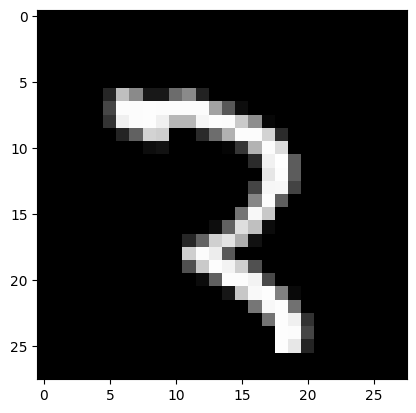

In [12]:
y_train[0]
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)
type(y_train_onehot)
y_train_onehot.shape
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [13]:
y_train_onehot[500]
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [14]:
model = keras.Sequential()
model.add (layers. Input (shape=(28,28,1)))
model.add (layers.Conv2D (filters=32, kernel_size=(3,3), activation='relu'))
model.add (layers.MaxPool2D (pool_size=(2,2)))
model.add (layers. Flatten())
model.add (layers.Dense (32, activation='relu'))
model.add (layers.Dense (16, activation='relu'))
model.add (layers.Dense (8, activation='relu'))
model.add (layers.Dense (10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │              90 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 174,162 (680.32 KB)

 Trainable params: 174,162 (680.32 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [17]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.7048 - loss: 0.9355 - val_accuracy: 0.9640 - val_loss: 0.1329
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.9682 - loss: 0.1174 - val_accuracy: 0.9750 - val_loss: 0.0827
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step - accuracy: 0.9786 - loss: 0.0750 - val_accuracy: 0.9778 - val_loss: 0.0728
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9844 - loss: 0.0537 - val_accuracy: 0.9807 - val_loss: 0.0607
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9879 - loss: 0.0400 - val_accuracy: 0.9795 - val_loss: 0.0658


<Axes: >

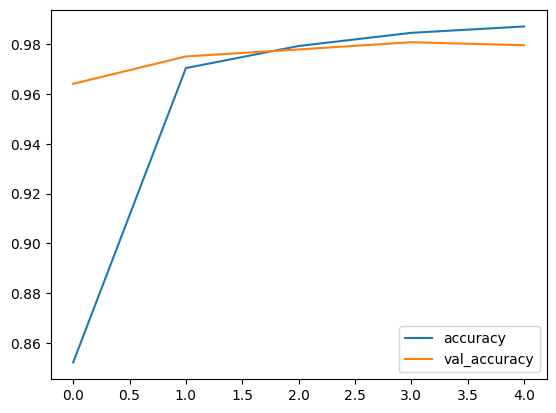

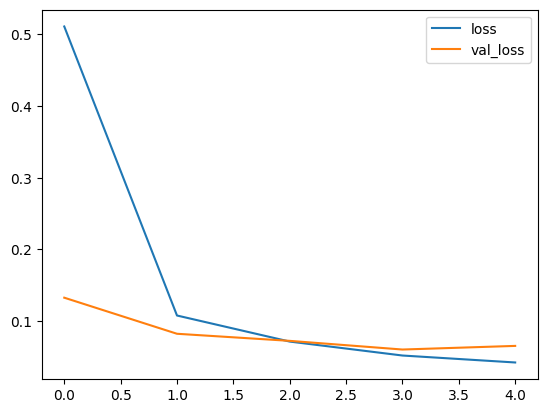

In [18]:
metrics = pd.DataFrame(model.history.history)

metrics.head()

metrics[['accuracy','val_accuracy']].plot()

metrics[['loss','val_loss']].plot()

In [20]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

print(confusion_matrix(y_test,x_test_predictions))

print(classification_report(y_test,x_test_predictions))

img = image.load_img('testmnist.png')
type(img)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[[ 940    0   25    0    1    0    5    1    8    0]
 [   0 1124    3    3    0    0    3    1    1    0]
 [   0    1 1025    0    0    0    0    6    0    0]
 [   0    0    3  998    0    7    0    1    1    0]
 [   0    1    2    0  968    0    6    1    1    3]
 [   0    0    1   11    0  876    3    0    1    0]
 [   2    2    1    0    2    4  945    0    2    0]
 [   0    2   14    2    0    0    0 1009    1    0]
 [   2    1    6    2    1    4    0    8  949    1]
 [   2    5    2    7   11    5    0    9    7  961]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.99      0.97      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98      

PIL.Image.Image

In [21]:
img = image.load_img('testmnist.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [22]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

print(x_single_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[5]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[5]


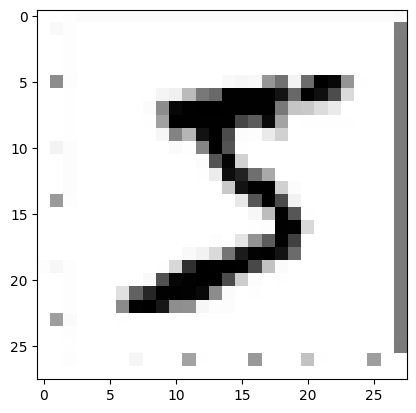

In [23]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)
print(x_single_prediction)